In [2]:
import numpy as np
import matplotlib.pyplot as plt
import np_info_analysis as na

In [3]:
#600nm
'''
matlab colors
#DD6734

#0284C0
'''
yellow='#ffb200'
blue='#0284C0'
red='#DD5544'

name='L3'

In [4]:
print('x\ty\tcx\tcy\tC\tstd\tint\tmaxint\trelBg')
print('\t'.join([str(i) for i in range(9)]))

x	y	cx	cy	C	std	int	maxint	relBg
0	1	2	3	4	5	6	7	8


In [5]:
main_folder='C:/Users/jabuk/Documents/jaderka/ufe/results/'
folder=main_folder+'L3/'

In [6]:
np=100
nm=[2, 1, 3, 4, 5]
# np=80
# nm=[10, 9, 8, 7, 6]
# np=60
# nm=[11, 12, 13, 14, 15]
# np=40
# nm=[26, 25, 22, 23, 24]


files=[folder+'norm_{:02.0f}_1'.format(f) for f in nm]
# files+=[folder+'meas_diff_02_1',
#         folder+'meas_diff_03_1',]
print('position in dip')
data=[]
data_std=[]


print('no\tx\ty\tcx\tcy\tC\tstd\tint\tmaxint\trelBg')
for file in files: 
    info=na.readinfo(file)
    info_stat=na.statistics(info)
    data.append(info_stat[0])
    data_std.append(info_stat[1])

    print('{}\t{:.01f}\t{:.01f}\t{:.02f}\t{:.02f}\t{:.02f}\t{:.05f}\t{:.05f}\t{:.05f}\t{:.05f}'.format(file[-4:-2], *info_stat[0]))
    print('n= {}\t{:.01f}\t{:.01f}\t{:.02f}\t{:.02f}\t{:.02f}\t{:.05f}\t{:.05f}\t{:.05f}\t{:.05f}'.format(info_stat[2], *info_stat[1]))
    print(80*'-')

position in dip
no	x	y	cx	cy	C	std	int	maxint	relBg
02	39.3	17.9	3.51	4.13	2.52	0.00062	0.08263	0.00468	0.00050
n= 10	7.9	3.6	0.86	1.05	0.49	0.00004	0.01870	0.00090	0.00003
--------------------------------------------------------------------------------
01	34.1	18.4	3.19	3.26	2.42	0.00060	0.06728	0.00396	0.00048
n= 11	6.5	5.6	1.34	1.23	0.61	0.00005	0.02787	0.00102	0.00004
--------------------------------------------------------------------------------
03	37.5	17.3	5.70	5.06	3.09	0.00032	0.05753	0.00359	0.00025
n= 10	6.4	3.8	1.88	1.43	0.59	0.00002	0.02959	0.00125	0.00001
--------------------------------------------------------------------------------
04	44.2	19.0	5.15	4.59	3.06	0.00048	0.10348	0.00486	0.00038
n= 10	5.3	3.8	1.56	1.17	0.59	0.00004	0.02986	0.00119	0.00003
--------------------------------------------------------------------------------
05	35.2	15.2	3.98	3.70	2.44	0.00104	0.10292	0.00693	0.00083
n= 10	6.0	2.9	0.51	0.64	0.30	0.00016	0.02225	0.00134	0.00013
-------------------

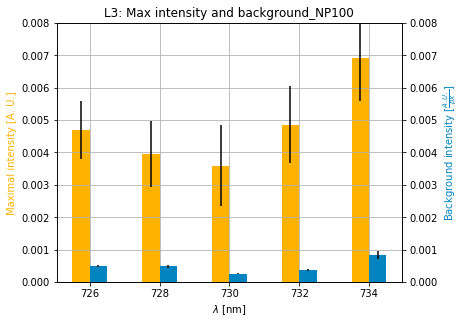

In [154]:
wls=[726, 728, 730, 732, 734]
data1=[d[7] for d in data]
data1_std=[d[7] for d in data_std]
data2=[d[8] for d in data]
data2_std=[d[8] for d in data_std]
area=[d[0]*d[1] for d in data]



w=0.5

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.9])
axes.grid('--')

title='Max intensity and background_NP'+str(np)
axes.set_title(name+': '+title)
axes.set_xlabel('$\lambda$ [nm]')
axes.set_ylabel('Maximal intensity [A. U.]', color=yellow)
axes.set_ylim([0, 0.008])

axesI = axes.twinx()
axesI.set_ylabel('Background intensity [$\\frac{A. U.}{px}$]', color=blue)
axesI.set_ylim([0, 0.008])

axes.bar([s-w/2 for s in wls], data1, w, yerr=data1_std, color=yellow, label='x')

axesI.bar([s+w/2 for s in wls], data2, w, yerr=data2_std, color=blue,label='y')
fig.savefig(folder+'plots/'+title.replace(' ', '_').lower()+'_'+name+'.png' , dpi=300,  bbox_inches='tight')

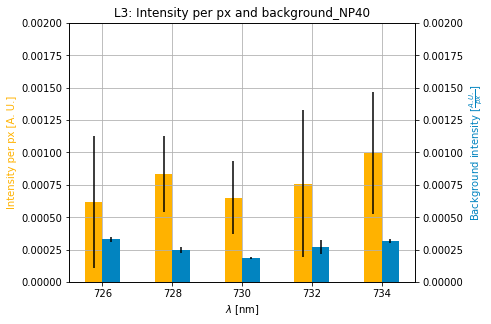

In [147]:
wls=[726, 728, 730, 732, 734]
data1=[d[6] for d in data]
data1_std=[d[6] for d in data_std]
data2=[d[8] for d in data]
data2_std=[d[8] for d in data_std]
area=[d[0]*d[1]/2.93**2 for d in data]

data3=[data1[i]/area[i] for i in range(len(data1))]
data3_std=[data1_std[i]/area[i] for i in range(len(data1_std))]

w=0.5

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.9])
axes.grid('--')

title='Intensity per px and background_NP'+str(np)
axes.set_title(name+': '+title)
axes.set_xlabel('$\lambda$ [nm]')
axes.set_ylabel('Intensity per px [A. U.]', color=yellow)
axes.set_ylim([0, 0.002])

axesI = axes.twinx()
axesI.set_ylabel('Background intensity [$\\frac{A. U.}{px}$]', color=blue)
axesI.set_ylim([0, 0.002])

axes.bar([s-w/2 for s in wls], data3, w, yerr=data3_std, color=yellow, label='x')

axesI.bar([s+w/2 for s in wls], data2, w, yerr=data2_std, color=blue,label='y')
fig.savefig(folder+'plots/'+title.replace(' ', '_').lower()+'_'+name+'.png' , dpi=300,  bbox_inches='tight')

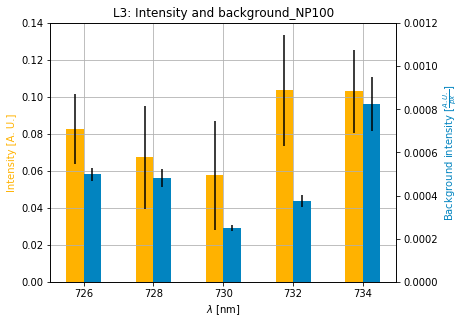

In [137]:
wls=[726, 728, 730, 732, 734]
data1=[d[6] for d in data]
data1_std=[d[6] for d in data_std]
data2=[d[8] for d in data]
data2_std=[d[8] for d in data_std]
area=[d[0]*d[1] for d in data]

w=0.5

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.9])
axes.grid('--')

title='Intensity and background_NP'+str(np)
axes.set_title(name+': '+title)
axes.set_xlabel('$\lambda$ [nm]')
axes.set_ylabel('Intensity [A. U.]', color=yellow)
axes.set_ylim([0, 0.14])

axesI = axes.twinx()
axesI.set_ylabel('Background intensity [$\\frac{A. U.}{px}$]', color=blue)
axesI.set_ylim([0, 0.0012])

axes.bar([s-w/2 for s in wls], data1, w, yerr=data1_std, color=yellow, label='x')

axesI.bar([s+w/2 for s in wls], data2, w, yerr=data2_std, color=blue,label='y')
fig.savefig(folder+'plots/'+title.replace(' ', '_').lower()+'_'+name+'.png' , dpi=300,  bbox_inches='tight')

In [1]:
wls=[726, 728, 730, 732, 734]
data1=[d[5] for d in data]
data1_std=[d[5] for d in data_std]
data2=[d[8] for d in data]
data2_std=[d[8] for d in data_std]
area=[d[0]*d[1] for d in data]

w=0.5

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.9])
axes.grid(linestyle='--')

title='Background_NP'+str(np)
axes.set_title(name+': '+title)
axes.set_xlabel('$\lambda$ [nm]')
axes.set_ylabel('Standard dev. of bg. [A. U.]', color=yellow)
axes.set_ylim([0, 0.0012])

axesI = axes.twinx()
axesI.set_ylabel('Background intensity [$\\frac{A. U.}{px}$]', color=blue)
axesI.set_ylim([0, 0.001])

axes.bar([s-w/2 for s in wls], data1, w, yerr=data1_std, color=yellow, label='x')

axesI.bar([s+w/2 for s in wls], data2, w, yerr=data2_std, color=blue,label='y')
fig.savefig(folder+'plots/'+title.lower()+'_'+name+'.png' , dpi=300,  bbox_inches='tight')

NameError: name 'data' is not defined

## Noise reduction with time

In [17]:
np=' decline in time'
nm=[5, 6, 15, 15] #jeste 30
# np=80
# nm=[10, 9, 8, 7, 6]
# np=60
# nm=[11, 12, 13, 14, 15]
# np=40
# nm=[26, 25, 22, 23, 24]


files=[folder+'norm_{:02.0f}_1'.format(f) for f in nm]
# files+=[folder+'meas_diff_02_1',
#         folder+'meas_diff_03_1',]

data=[]
data_std=[]


print('no\tx\ty\tcx\tcy\tC\tstd\tint\tmaxint\trelBg')
for file in files: 
    info=na.readinfo(file)
    info_stat=na.statistics(info)
    data.append(info_stat[0])
    data_std.append(info_stat[1])

#     print('{}\t{:.01f}\t{:.01f}\t{:.02f}\t{:.02f}\t{:.02f}\t{:.05f}\t{:.05f}\t{:.05f}\t{:.05f}'.format(file[-4:-2], *info_stat[0]))
#     print('n= {}\t{:.01f}\t{:.01f}\t{:.02f}\t{:.02f}\t{:.02f}\t{:.05f}\t{:.05f}\t{:.05f}\t{:.05f}'.format(info_stat[2], *info_stat[1]))
#     print(80*'-')

no	x	y	cx	cy	C	std	int	maxint	relBg


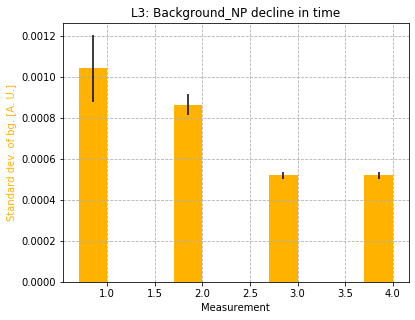

In [23]:
ts=[1, 2, 3, 4]
data1=[d[5] for d in data]
data1_std=[d[5] for d in data_std]
data2=[d[8] for d in data]
data2_std=[d[8] for d in data_std]
area=[d[0]*d[1] for d in data]

w=0.3

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.9])
axes.grid(linestyle='--')

title='Background_NP'+str(np)
axes.set_title(name+': '+title)
axes.set_xlabel('Measurement')
axes.set_ylabel('Standard dev. of bg. [A. U.]', color=yellow)

# axesI = axes.twinx()
# axesI.set_ylabel('Intensity per one px [A. U.]', color=blue)

axes.bar([s-w/2 for s in ts], data1, w, yerr=data1_std, color=yellow, label='x')

# axesI.bar([s+w/2 for s in ts], data2, w, yerr=data2_std, color=blue,label='y')
fig.savefig(folder+'plots/'+title.lower()+'_'+name+'.png' , dpi=300,  bbox_inches='tight')

# Different NP sizes

In [165]:
# wl=734
# nm=[5, 6, 15, 24]  
# wl=732
# nm=[4, 7, 14, 23]
# wl=730
# nm=[3, 8, 13, 22]
# wl=728
# nm=[1, 9, 12, 25]
wl=726
nm=[2, 10, 11, 26]


files=[folder+'norm_{:02.0f}_1'.format(f) for f in nm]
# files+=[folder+'meas_diff_02_1',
#         folder+'meas_diff_03_1',]
print('position in dip')
data=[]
data_std=[]


print('no\tx\ty\tcx\tcy\tC\tstd\tint\tmaxint\trelBg')
for file in files: 
    info=na.readinfo(file)
    info_stat=na.statistics(info)
    data.append(info_stat[0])
    data_std.append(info_stat[1])

    print('{}\t{:.01f}\t{:.01f}\t{:.02f}\t{:.02f}\t{:.02f}\t{:.05f}\t{:.05f}\t{:.05f}\t{:.05f}'.format(file[-4:-2], *info_stat[0]))
    print('n= {}\t{:.01f}\t{:.01f}\t{:.02f}\t{:.02f}\t{:.02f}\t{:.05f}\t{:.05f}\t{:.05f}\t{:.05f}'.format(info_stat[2], *info_stat[1]))
    print(80*'-')

position in dip
no	x	y	cx	cy	C	std	int	maxint	relBg
02	39.3	17.9	3.51	4.13	2.52	0.00062	0.08263	0.00468	0.00050
n= 10	7.9	3.6	0.86	1.05	0.49	0.00004	0.01870	0.00090	0.00003
--------------------------------------------------------------------------------
10	35.2	14.9	3.73	3.33	2.27	0.00060	0.05205	0.00404	0.00048
n= 10	3.5	3.3	0.57	1.14	0.42	0.00004	0.01042	0.00074	0.00003
--------------------------------------------------------------------------------
11	35.5	13.2	3.09	3.87	2.18	0.00059	0.04306	0.00380	0.00047
n= 10	6.6	3.5	0.50	1.04	0.45	0.00002	0.01572	0.00079	0.00002
--------------------------------------------------------------------------------
26	30.2	7.9	2.90	3.73	2.27	0.00041	0.01707	0.00232	0.00033
n= 10	6.3	3.7	1.08	1.23	0.58	0.00002	0.01417	0.00087	0.00002
--------------------------------------------------------------------------------


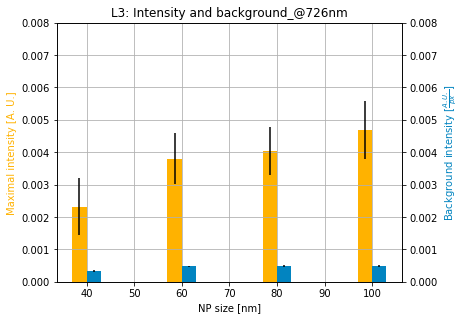

In [166]:
nps=[100, 80, 60, 40]
data1=[d[7] for d in data]
data1_std=[d[7] for d in data_std]
data2=[d[8] for d in data]
data2_std=[d[8] for d in data_std]
area=[d[0]*d[1] for d in data]

w=3

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.9])
axes.grid('--')

title='Intensity and background_@'+str(wl)+'nm'
axes.set_title(name+': '+title)
axes.set_xlabel('NP size [nm]')
axes.set_ylabel('Maximal intensity [A. U.]', color=yellow)
axes.set_ylim([0, 0.008])

axesI = axes.twinx()
axesI.set_ylabel('Background intensity [$\\frac{A. U.}{px}$]', color=blue)
axesI.set_ylim([0, 0.008])


axes.bar([s-w/2 for s in nps], data1, w, yerr=data1_std, color=yellow, label='x')

axesI.bar([s+w/2 for s in nps], data2, w, yerr=data2_std, color=blue,label='y')
fig.savefig(folder+'plots/'+title.replace(' ', '_').lower()+'_'+name+'.png' , dpi=300,  bbox_inches='tight')